### Location Input

In [1]:
import googlemaps
import os

# User Input with autocomplete using Google Maps API
def get_location():
    API_KEY = os.environ.get('GOOGLE_MAPS_API_KEY')
    gmaps = googlemaps.Client(key=API_KEY)
    geocordinates = gmaps.geocode(input('Enter your location: '))[0]['geometry']['location']
    return geocordinates
# get_location()


In [2]:
"""Testing the function"""
# data = [{'address_components': [{'long_name': 'Singrauli', 'short_name': 'Singrauli', 'types': ['locality', 'political']}, {'long_name': 'Singrauli', 'short_name': 'Singrauli', 'types': ['administrative_area_level_3', 'political']}, {'long_name': 'Rewa Division', 'short_name': 'Rewa Division', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'Madhya Pradesh', 'short_name': 'MP', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'India', 'short_name': 'IN', 'types': ['country', 'political']}], 'formatted_address': 'Singrauli, Madhya Pradesh, India', 'geometry': {'bounds': {'northeast': {'lat': 24.2109604, 'lng': 82.6867104}, 'southwest': {'lat': 24.1869257, 'lng': 82.6352118}}, 'location': {'lat': 24.1989544, 'lng': 82.6676209}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 24.2109604, 'lng': 82.6867104}, 'southwest': {'lat': 24.1869257, 'lng': 82.6352118}}}, 'place_id': 'ChIJgf8xwzU6jzkR-sONorrkAAU', 'types': ['locality', 'political']}]

# geocordinates = data[0]['geometry']['location']

'Testing the function'

In [3]:
# Date and Time Input
from datetime import datetime
def get_date_time(message='Enter date (YYYY-MM-DD):'):
    date = input(message)
    return date

### Hourly Variables
| Variable                            | Impact on Weather or Climate                                                                                                           |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| Temperature (2 m)                   | Directly affects evaporation rates, air density, and influences overall weather patterns and climate.                                   |
| Relative Humidity (2 m)             | Determines moisture in the air, influencing precipitation potential and perceived comfort levels.                                       |
| Dewpoint (2 m)                      | Indicates moisture saturation; when reached, it leads to cloud formation and potential precipitation.                                   |
| Apparent Temperature                | Reflects perceived temperature by combining actual temperature and humidity, affecting how organisms experience weather.                |
| Precipitation (rain + snow)         | Supplies water to ecosystems, influences soil moisture, and drives hydrological processes.                                              |
| Rain                                | Critical for agriculture, water resources, and vegetation growth, affecting local and regional climates.                                |
| Snowfall                            | Contributes to snowpack and water reserves, with implications for winter sports and ecosystem health.                                   |
| Snow depth                          | Influences road conditions, agriculture, and overall water availability upon melting.                                                   |
| Weather code                        | Summarizes prevailing conditions, offering quick reference to weather patterns and potential climate impacts.                           |
| Sealevel Pressure                   | Affects wind formation and large-scale weather systems, driving movements of air masses.                                                 |
| Surface Pressure                    | Influences local wind patterns and can signal approaching weather systems or changes.                                                    |
| Cloud cover Total                   | Modulates solar radiation, temperature, and can indicate the likelihood of precipitation.                                                |
| Cloud cover Low                     | Influences near-surface temperatures and local precipitation events.                                                                    |
| Cloud cover Mid                     | Affects weather system development and mid-level atmospheric conditions.                                                                 |
| Cloud cover High                    | Impacts radiation balance and can signal approaching large-scale weather changes.                                                        |
| Reference Evapotranspiration (ET₀) | Guides water management in agriculture, indicating how much water crops need based on atmospheric conditions.                            |
| Vapour Pressure Deficit             | Shows the atmosphere’s drying power; higher values increase plant water demand and evaporation.                                          |
| Wind Speed (10 m)                   | Affects local weather conditions, air dispersion, and can impact transportation and outdoor activities.                                 |
| Wind Speed (100 m)                  | Important for wind energy assessments and forecasting broader weather systems.                                                           |
| Wind Direction (10 m)               | Drives local weather patterns and pollution dispersion.                                                                                 |
| Wind Direction (100 m)              | Influences large-scale weather systems and is relevant to aviation.                                                                     |
| Wind Gusts (10 m)                   | Can cause sudden changes in conditions, affecting outdoor safety and infrastructure.                                                    |
| Soil Temperature (0-7 cm)           | Impacts seed germination, microbial activity, and plant emergence.                                                                      |
| Soil Temperature (7-28 cm)          | Influences root development and nutrient cycling in deeper soil layers.                                                                 |
| Soil Temperature (28-100 cm)        | Affects growth of deep-rooted plants, moderating soil processes over time.                                                              |
| Soil Temperature (100-255 cm)       | Plays a role in groundwater recharge and long-term soil and climatic interactions.                                                      |
| Soil Moisture (0-7 cm)              | Critical for surface runoff, plant water availability, and soil erosion processes.                                                      |
| Soil Moisture (7-28 cm)             | Influences root uptake, plant stress, and evaporation rates.                                                                            |
| Soil Moisture (28-100 cm)           | Affects water availability for deeper root systems and soil water storage capacity.                                                     |
| Soil Moisture (100-255 cm)          | Helps maintain long-term moisture reserves, impacting groundwater and broader climate feedbacks.                                        |


In [4]:
base_url = "https://archive-api.open-meteo.com/v1/archive?"

# Hourly weather data
def get_hourly_weather_data(geocordinates, start_date, end_date):
    hourly_variables = [
        "temperature_2m",
        "relative_humidity_2m",
        "dewpoint_2m",
        "apparent_temperature",
        "precipitation",
        "rain",
        "snowfall",
        "snow_depth",
        "weather_code",
        "pressure_msl",
        "surface_pressure",
        "cloud_cover",
        "cloud_cover_low",
        "cloud_cover_mid", 
        "cloud_cover_high",
        "et0_fao_evapotranspiration",
        "vapour_pressure_deficit",
        "wind_speed_10m",
        "wind_speed_100m", 
        "wind_direction_10m",
        "wind_direction_100m",
        "wind_gusts_10m",
        "soil_temperature_0_to_7cm",
        "soil_temperature_7_to_28cm",
        "soil_temperature_28_to_100cm",
        "soil_temperature_100_to_255cm",
        "soil_moisture_0_to_7cm",
        "soil_moisture_7_to_28cm",
        "soil_moisture_28_to_100cm",
        "soil_moisture_100_to_255cm"
    ]

    url = base_url
    print("Start Date should be less than End Date\n")
    latitude = geocordinates['lat']
    longitude = geocordinates['lng']

    # https://archive-api.open-meteo.com/v1/archive?latitude=24.1997&longitude=82.6753&start_date=2010-01-01&end_date=2019-12-31&hourly=et0_fao_evapotranspiration,wind_direction_100m,soil_moisture_100_to_255cm&daily=weather_code,temperature_2m_max,temperature_2m_min,sunrise,sunset,daylight_duration,precipitation_sum,rain_sum,et0_fao_evapotranspiration&timezone=GMT&models=best_match
    
    # Parameters with specific group of variables for hourly data for specific type of trend the user wants to see
    url += f"latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly="
    for variable in hourly_variables:
        url += variable + ","
    
    url += "&timezone=GMT&models=best_match"
    return url
        


    

## Daily Variables
| Variable                            | Impact on Weather or Climate                                                                                                           |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------|
| Weather code                        | Describes the overall weather conditions, aiding in forecasting and climate analysis.                                                 |
| Maximum Temperature (2 m)           | Indicates the highest temperature reached, affecting heatwaves and energy consumption.                                               |
| Minimum Temperature (2 m)           | Indicates the lowest temperature achieved, impacting frost formation and agriculture.                                                |
| Mean Temperature (2 m)              | Represents the average temperature, crucial for climate studies and trend analysis.                                                   |
| Maximum Apparent Temperature (2 m)  | Reflects the highest perceived temperature, combining actual temperature and humidity, affecting human comfort.                        |
| Minimum Apparent Temperature (2 m)  | Reflects the lowest perceived temperature, influencing human comfort and heating requirements.                                        |
| Mean Apparent Temperature (2 m)     | Represents the average perceived temperature, important for assessing overall comfort levels.                                         |
| Sunrise                             | Marks the start of daylight, influencing daily cycles and solar energy availability.                                                  |
| Sunset                              | Marks the end of daylight, affecting daily cycles and solar energy planning.                                                           |
| Daylight Duration                   | Duration of daylight affects photosynthesis, energy consumption, and daily activities.                                                 |
| Sunshine Duration                   | Amount of sunshine influences solar power generation, plant growth, and UV exposure.                                                 |
| Precipitation Sum                   | Total precipitation is vital for water resource management, agriculture, and flood forecasting.                                         |
| Rain Sum                            | Total rainfall affects agriculture, water supply, and flood risks.                                                                     |
| Snowfall Sum                        | Total snowfall impacts water reserves, transportation, and winter activities.                                                          |
| Precipitation Hours                 | Number of hours with precipitation affects soil moisture and flood risk assessment.                                                   |
| Maximum Wind Speed (10 m)           | Affects wind energy potential, weather severity, and structural safety.                                                                |
| Maximum Wind Gusts (10 m)           | Indicates extreme wind events, impacting building safety and outdoor activities.                                                        |
| Dominant Wind Direction (10 m)      | Influences weather patterns, pollution dispersion, and maritime navigation.                                                             |
| Shortwave Radiation Sum             | Total incoming solar radiation impacts temperature regulation, photosynthesis, and energy balance.                                    |
| Reference Evapotranspiration (ET₀)  | Guides irrigation planning and water resource management by estimating atmospheric demand for moisture.                                   |

Understanding WMO Weather Codes
Common WMO Weather Codes and their meanings:

| Code | Weather Condition | Description |
|------|------------------|-------------|
| 0 | Clear sky | Complete absence of clouds |
| 1 | Mainly clear | 1/8 to 2/8 cloud cover |
| 2 | Partly cloudy | 3/8 to 4/8 cloud cover |
| 3 | Overcast | 5/8 to 8/8 cloud cover |
| 45 | Foggy | Visibility reduced by fog |
| 48 | Depositing rime fog | Fog depositing rime |
| 51 | Light drizzle | Slight precipitation of very fine droplets |
| 53 | Moderate drizzle | Steadier precipitation of fine droplets |
| 55 | Dense drizzle | Heavy precipitation of fine droplets |
| 61 | Light rain | Slight precipitation of water droplets |
| 63 | Moderate rain | Steadier precipitation of water droplets |
| 65 | Heavy rain | Strong precipitation of water droplets |
| 71 | Light snow | Slight precipitation of snow |
| 73 | Moderate snow | Steadier precipitation of snow |
| 75 | Heavy snow | Strong precipitation of snow |
| 77 | Snow grains | Very small, white, opaque grains of ice |
| 80 | Light rain showers | Brief light rain |
| 81 | Moderate rain showers | Brief moderate rain |
| 82 | Violent rain showers | Brief heavy rain |
| 95 | Thunderstorm | Storm with lightning and thunder |

In [5]:
def get_daily_weather_data(geocordinates, start_date, end_date):

    daily_variables = [
        "weather_code",
        "temperature_2m_max",
        "temperature_2m_min",
        "temperature_2m_mean",
        "apparent_temperature_max",
        "apparent_temperature_min",
        "apparent_temperature_mean",
        "sunrise",
        "sunset",
        "daylight_duration",
        "sunshine_duration",
        "precipitation_sum",
        "rain_sum",
        "snowfall_sum",
        "precipitation_hours",
        "wind_speed_10m_max",
        "wind_gusts_10m_max",
        "wind_direction_10m_dominant",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration"
    ]


    url = base_url
    print("Start Date should be less than End Date\n")
    latitude = geocordinates['lat']
    longitude = geocordinates['lng']

    # Parameters with specific group of variables for daily data for specific type of trend the user wants to see

    url += f"latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&daily="
    for variable in daily_variables:
        url += variable + ","

    url += "&timezone=GMT&models=best_match"

    return url

### Data Collection and Processing

In [11]:
import requests
import pandas as pd
from datetime import datetime
def get_data():
    print("1. Hourly Data\n2. Daily Data\n")
    choice = int(input("Enter your choice: "))
    if choice not in [1, 2]:
        raise ValueError("Invalid Choice")
    geocordinates = get_location()
    # geocordinates = {'lat': 24.217924, 'lng': 82.62766}
    start_date = get_date_time("Enter Start Date (YYYY-MM-DD): ")
    end_date = get_date_time("Enter End Date (YYYY-MM-DD): ")
    if datetime.strptime(start_date, "%Y-%m-%d") > datetime.strptime(end_date, "%Y-%m-%d"):
        raise ValueError("Start Date should be less than End Date")
    
    # Get the stored dataset
    log = pd.read_csv("Data/log.csv")

    # Get the data from the API    
    if choice == 1:
        # check if the data is already stored in the log columns=['latitude','longitude','type','start-time','end-time','file-path']
        print("Checking if the data is already stored in the log file")
        print(log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)])
        if log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)].shape[0] > 0:
            file_path = log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'hourly') & (log['start-time'] == start_date) & (log['end-time'] == end_date)]['file-path'].values[0]
            print("Data already exists in the log file")
            print("Data is stored in the file: ", file_path)
            return pd.read_csv(f"Data/{file_path}", index_col=0)
        else:
            url = get_hourly_weather_data(geocordinates, start_date, end_date)
            print(url)
            hourly_data = requests.get(url).json()
            print("Hourly Data:")
            print(hourly_data)
            return hourly_data

    elif choice == 2:
        # check if the data is already stored in the log columns=['latitude','longitude','type','start-time','end-time','file-path']

        if log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'daily') & (log['start-time'] == start_date) & (log['end-time'] == end_date)].shape[0] > 0:
            file_path = log[(log['latitude'] == geocordinates['lat']) & (log['longitude'] == geocordinates['lng']) & (log['type'] == 'daily') & (log['start-time'] == start_date) & (log['end-time'] == end_date)]['file-path'].values[0]
            print("Data already exists in the log file")
            print("Data is stored in the file: ", file_path)
            return pd.read_csv(f"Data/{file_path}", index_col=0)
        else:
            url = get_daily_weather_data(geocordinates, start_date, end_date)
            print(url)
            daily_data = requests.get(url).json()
            print("Daily Data:")
            print(daily_data)
            return daily_data
    else:
        print("Invalid Choice")
        return None
data = get_data()
print(data)

1. Hourly Data
2. Daily Data

Checking if the data is already stored in the log file
   Unnamed: 0   latitude  longitude    type  start-time    end-time  \
2           2  24.217924   82.62766  hourly  2023-12-01  2023-12-01   

                                           file-path  
2  Hourly/24.217924-82.62766;2023-12-01-2023-12-0...  
Data already exists in the log file
Data is stored in the file:  Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv
                                latitude  longitude  generationtime_ms  \
time                           24.217924   82.62766           0.445008   
temperature_2m                 24.217924   82.62766           0.445008   
relative_humidity_2m           24.217924   82.62766           0.445008   
dewpoint_2m                    24.217924   82.62766           0.445008   
apparent_temperature           24.217924   82.62766           0.445008   
precipitation                  24.217924   82.62766           0.445008   
rain                       

In [27]:
import pandas as pd
def get_to_csv(data):
    df = pd.DataFrame(data)
    log = pd.read_csv('Data/log.csv', index_col=0)

    latitude = data["latitude"]
    longitude = data["longitude"]

    if 'hourly' in data:
        start_time = data["hourly"]['time'][0].split('T')[0]
        end_time = data["hourly"]['time'][-1].split('T')[0]
        data_type = 'hourly'
        file_name = f"{latitude}-{longitude};{start_time}-{end_time}.csv"
        file_path = f'Hourly/{file_name}'
    elif 'daily' in data:
        start_time = data["daily"]['time'][0]
        end_time = data["daily"]['time'][-1]
        data_type = 'daily'
        file_name = f"{latitude}-{longitude};{start_time}-{end_time}.csv"
        file_path = f'Daily/{file_name}'
    else:
        print("Invalid data format")
        return

    # Check if entry already exists
    existing = log[
        (log['latitude'] == latitude) & 
        (log['longitude'] == longitude) & 
        (log['type'] == data_type) & 
        (log['start-time'] == start_time) & 
        (log['end-time'] == end_time)
    ]

    if existing.empty:
        # Save data only if it doesn't exist
        df.to_csv(f'Data/{file_path}')
        new_entry = pd.Series({
            'latitude': latitude,
            'longitude': longitude,
            'type': data_type,
            'start-time': start_time,
            'end-time': end_time,
            'file-path': file_path
        })
        log = log._append(new_entry, ignore_index=True)
        log.to_csv('Data/log.csv')
        print(f"Data saved to {file_path}")
    else:
        print("Data already exists in the log file")
        print("Data is stored in the file: ", 'Data/'+existing['file-path'].values[0])

get_to_csv(data)

Data already exists in the log file
Data is stored in the file:  Data/Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv


### Data Visualization

Hourly

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
import os

file_path = 'Data/Hourly/24.217924-82.62766;2023-12-01-2023-12-01.csv'
if os.path.exists(file_path):
	hourly_data_df = pd.read_csv(file_path)
	print(hourly_data_df.columns) # Columns in the hourly data
	# ids in the hourly data
	ids = hourly_data_df['Unnamed: 0'].unique()
	print(ids)
else:
	print(f"File not found: {file_path}")


Index(['Unnamed: 0', 'latitude', 'longitude', 'generationtime_ms',
       'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation',
       'hourly_units', 'hourly'],
      dtype='object')
['time' 'temperature_2m' 'relative_humidity_2m' 'dewpoint_2m'
 'apparent_temperature' 'precipitation' 'rain' 'snowfall' 'snow_depth'
 'weather_code' 'pressure_msl' 'surface_pressure' 'cloud_cover'
 'cloud_cover_low' 'cloud_cover_mid' 'cloud_cover_high'
 'et0_fao_evapotranspiration' 'vapour_pressure_deficit' 'wind_speed_10m'
 'wind_speed_100m' 'wind_direction_10m' 'wind_direction_100m'
 'wind_gusts_10m' 'soil_temperature_0_to_7cm' 'soil_temperature_7_to_28cm'
 'soil_temperature_28_to_100cm' 'soil_temperature_100_to_255cm'
 'soil_moisture_0_to_7cm' 'soil_moisture_7_to_28cm'
 'soil_moisture_28_to_100cm' 'soil_moisture_100_to_255cm']


In [15]:
# Get the data for a specific id
id = ids[0]
id_data = hourly_data_df[hourly_data_df['Unnamed: 0'] == id]
print(id_data)

  Unnamed: 0   latitude  longitude  generationtime_ms  utc_offset_seconds  \
0       time  24.217924   82.62766           0.445008                   0   

  timezone timezone_abbreviation  elevation hourly_units  \
0      GMT                   GMT      398.0      iso8601   

                                              hourly  
0  ['2023-12-01T00:00', '2023-12-01T01:00', '2023...  


In [16]:
print(hourly_data_df['Unnamed: 0']+":"+hourly_data_df['hourly'])

0     time:['2023-12-01T00:00', '2023-12-01T01:00', ...
1     temperature_2m:[17.6, 18.0, 18.4, 18.8, 19.0, ...
2     relative_humidity_2m:[99, 97, 97, 95, 96, 96, ...
3     dewpoint_2m:[17.4, 17.5, 18.0, 18.1, 18.3, 18....
4     apparent_temperature:[19.2, 19.4, 20.1, 20.2, ...
5     precipitation:[0.2, 5.2, 1.8, 0.6, 1.4, 1.4, 1...
6     rain:[0.2, 5.2, 1.8, 0.6, 1.4, 1.4, 1.5, 1.1, ...
7     snowfall:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
8     snow_depth:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9     weather_code:[51, 63, 61, 53, 61, 61, 61, 55, ...
10    pressure_msl:[1016.4, 1017.2, 1017.8, 1018.4, ...
11    surface_pressure:[970.2, 971.0, 971.6, 972.3, ...
12    cloud_cover:[77, 100, 100, 100, 100, 100, 100,...
13    cloud_cover_low:[14, 11, 14, 12, 9, 16, 17, 41...
14    cloud_cover_mid:[77, 100, 100, 100, 100, 100, ...
15    cloud_cover_high:[0, 100, 90, 100, 100, 100, 1...
16    et0_fao_evapotranspiration:[0.0, 0.0, 0.02, 0....
17    vapour_pressure_deficit:[0.03, 0.06, 0.06,

In [45]:
import csv
import ast

# Initialize a dictionary to hold the data
weather_data = {}

# Read the CSV file
with open(f'{file_path}', 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip the header
    
    # Loop through each row
    for row in reader:
        variable_name = row[0]
        values_str = row[-1]  # The last column contains the data array as a string
        values_list = ast.literal_eval(values_str)  # Convert string to list
        
        # Add to dictionary
        weather_data[variable_name] = values_list

# Create a hour list in the dictionary
weather_data['hour'] = [t.split('T')[-1] for t in weather_data['time']]

# Access specific data
temperature = weather_data['temperature_2m']
humidity = weather_data['relative_humidity_2m']
times = weather_data['time']

# Example: Print temperature at each hour
for t, temp in zip(times, temperature):
    print(f"At {t}, the temperature is {temp}°C")

At 2023-12-01T00:00, the temperature is 17.6°C
At 2023-12-01T01:00, the temperature is 18.0°C
At 2023-12-01T02:00, the temperature is 18.4°C
At 2023-12-01T03:00, the temperature is 18.8°C
At 2023-12-01T04:00, the temperature is 19.0°C
At 2023-12-01T05:00, the temperature is 19.1°C
At 2023-12-01T06:00, the temperature is 19.3°C
At 2023-12-01T07:00, the temperature is 19.7°C
At 2023-12-01T08:00, the temperature is 19.9°C
At 2023-12-01T09:00, the temperature is 20.0°C
At 2023-12-01T10:00, the temperature is 20.3°C
At 2023-12-01T11:00, the temperature is 20.2°C
At 2023-12-01T12:00, the temperature is 19.6°C
At 2023-12-01T13:00, the temperature is 19.3°C
At 2023-12-01T14:00, the temperature is 19.3°C
At 2023-12-01T15:00, the temperature is 19.0°C
At 2023-12-01T16:00, the temperature is 18.9°C
At 2023-12-01T17:00, the temperature is 18.8°C
At 2023-12-01T18:00, the temperature is 18.7°C
At 2023-12-01T19:00, the temperature is 18.6°C
At 2023-12-01T20:00, the temperature is 18.3°C
At 2023-12-01

In [47]:
print(weather_data)

{'time': ['2023-12-01T00:00', '2023-12-01T01:00', '2023-12-01T02:00', '2023-12-01T03:00', '2023-12-01T04:00', '2023-12-01T05:00', '2023-12-01T06:00', '2023-12-01T07:00', '2023-12-01T08:00', '2023-12-01T09:00', '2023-12-01T10:00', '2023-12-01T11:00', '2023-12-01T12:00', '2023-12-01T13:00', '2023-12-01T14:00', '2023-12-01T15:00', '2023-12-01T16:00', '2023-12-01T17:00', '2023-12-01T18:00', '2023-12-01T19:00', '2023-12-01T20:00', '2023-12-01T21:00', '2023-12-01T22:00', '2023-12-01T23:00'], 'temperature_2m': [17.6, 18.0, 18.4, 18.8, 19.0, 19.1, 19.3, 19.7, 19.9, 20.0, 20.3, 20.2, 19.6, 19.3, 19.3, 19.0, 18.9, 18.8, 18.7, 18.6, 18.3, 18.0, 17.9, 17.8], 'relative_humidity_2m': [99, 97, 97, 95, 96, 96, 95, 94, 93, 92, 90, 90, 93, 98, 99, 99, 99, 99, 99, 99, 100, 100, 100, 100], 'dewpoint_2m': [17.4, 17.5, 18.0, 18.1, 18.3, 18.5, 18.6, 18.6, 18.7, 18.7, 18.5, 18.5, 18.5, 19.0, 19.1, 18.9, 18.8, 18.7, 18.6, 18.5, 18.3, 18.0, 17.9, 17.8], 'apparent_temperature': [19.2, 19.4, 20.1, 20.2, 21.2, 21.

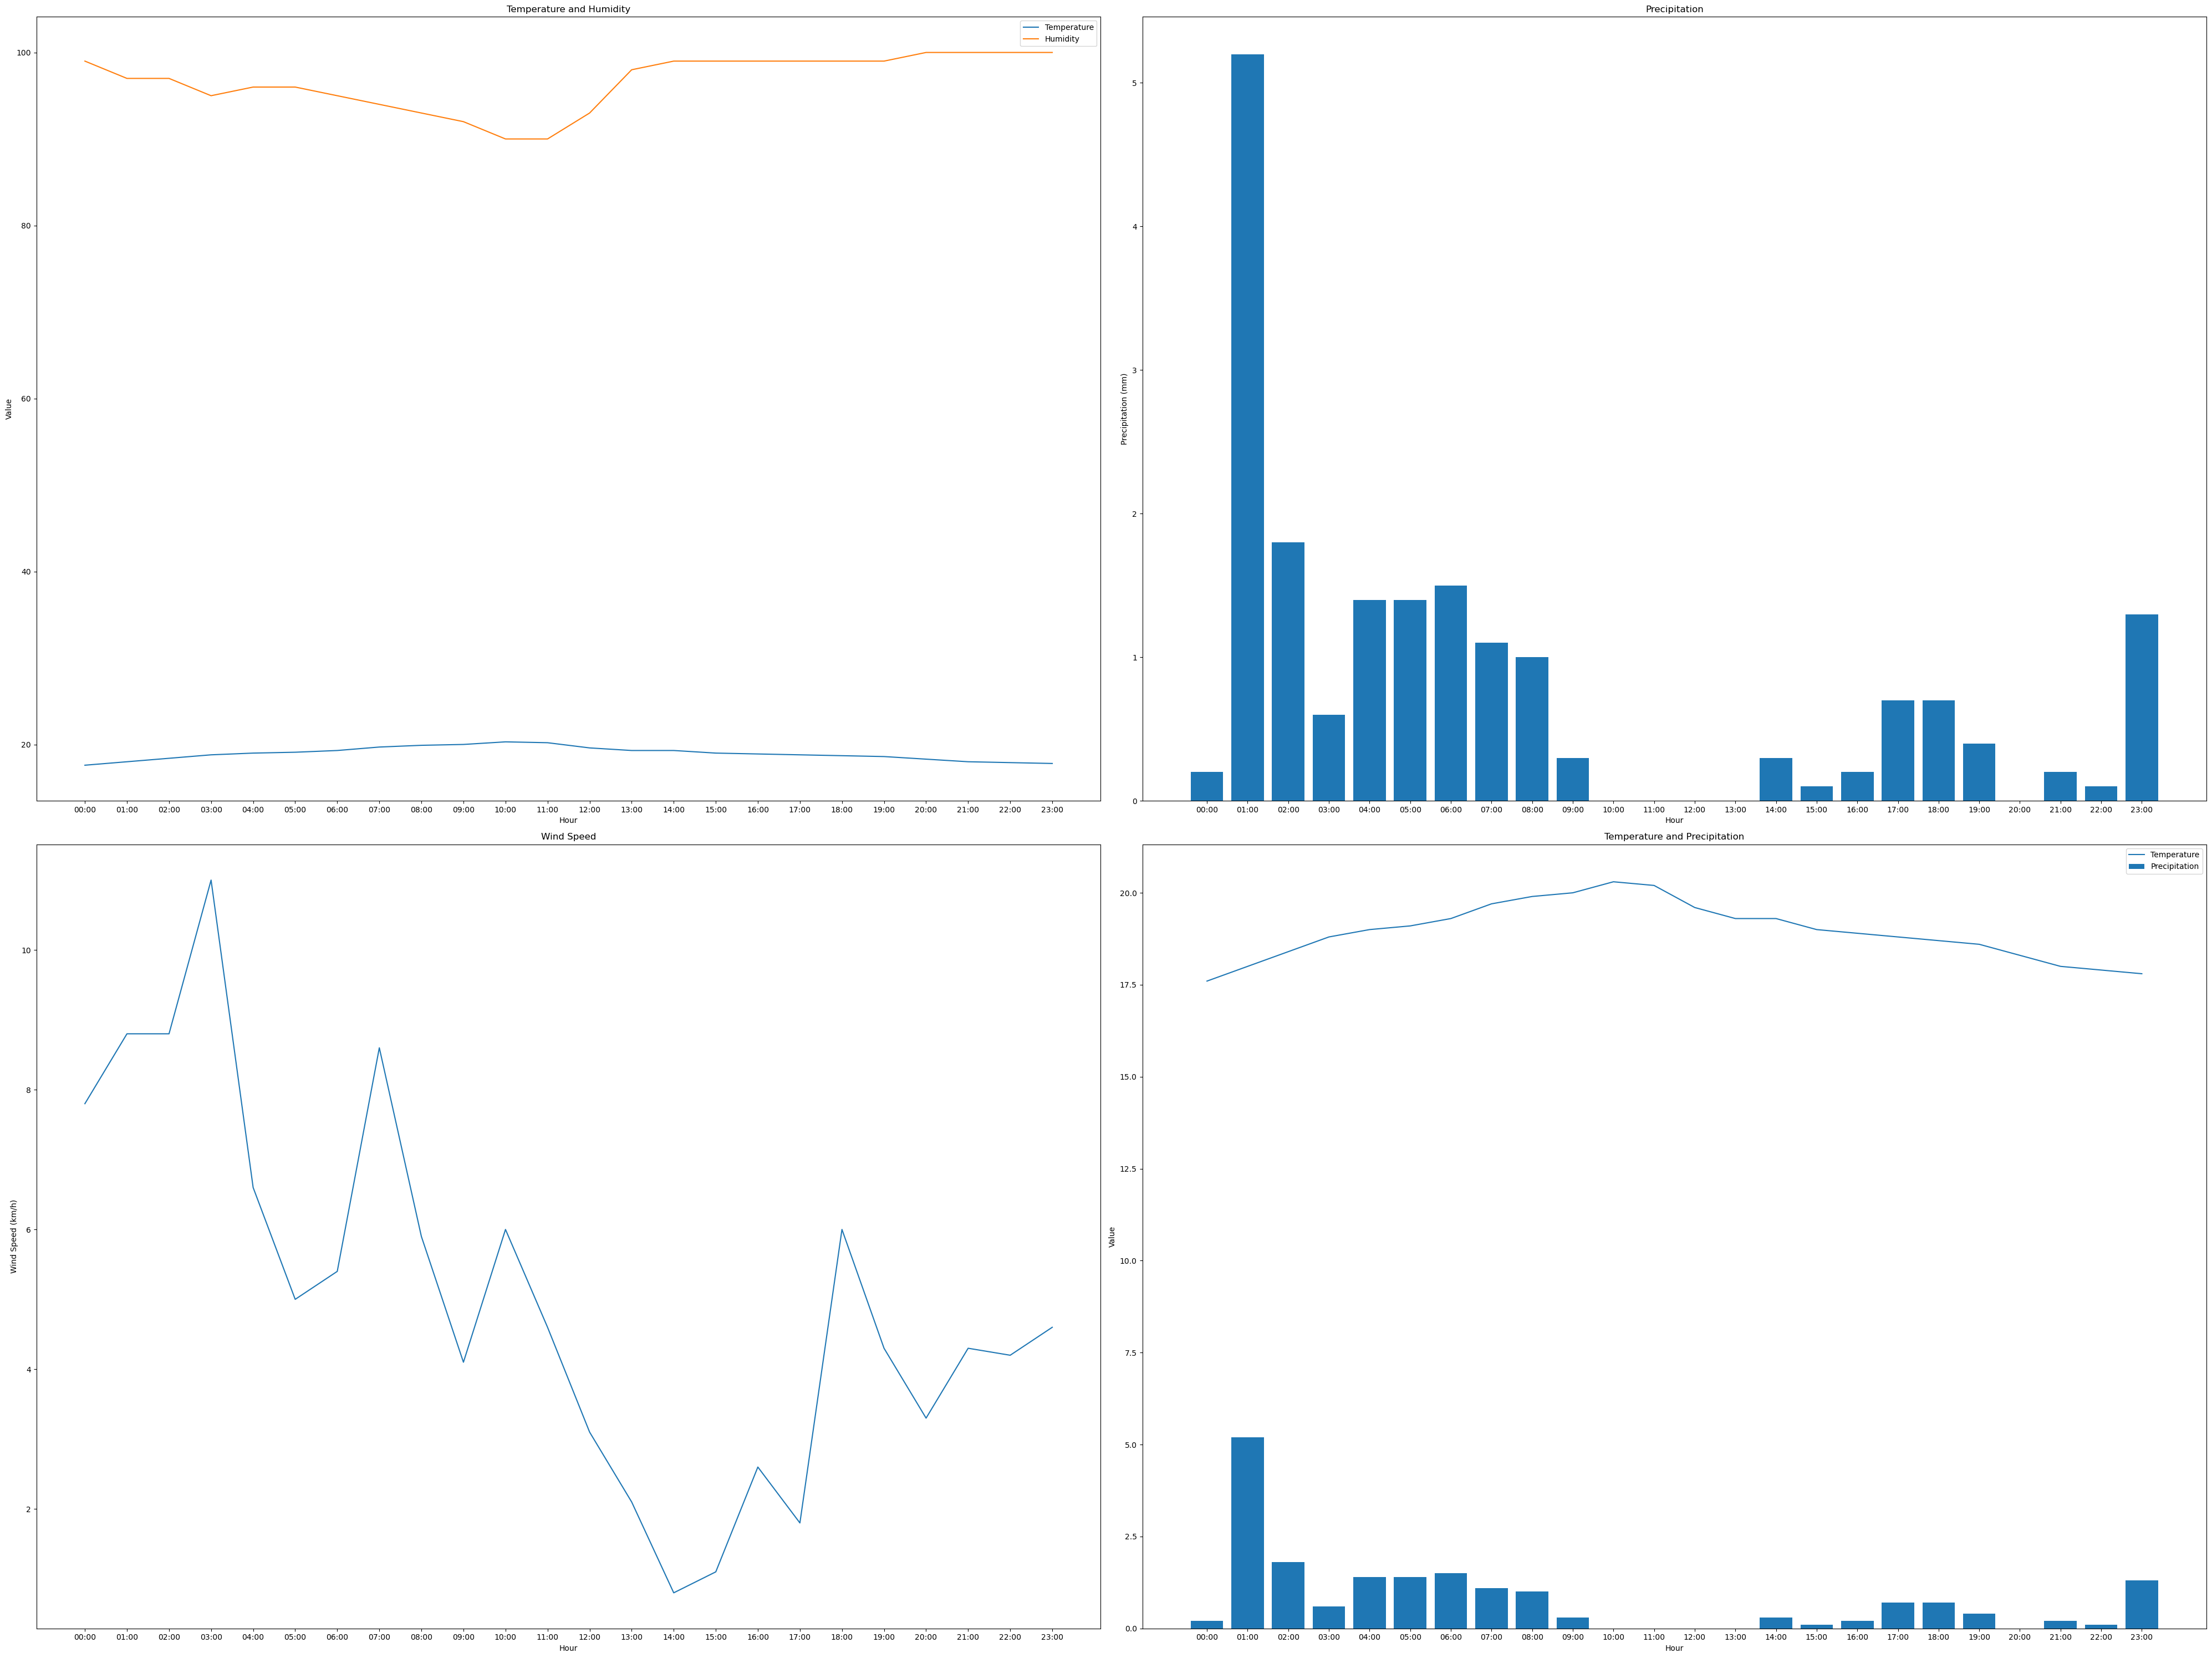

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(weather_data)

# Create a figure and axis
fig, ax = plt.subplots(2, 2, figsize=(40, 30))

# Plot temperature and humidity
ax[0, 0].plot(df['hour'], df['temperature_2m'], label='Temperature')
ax[0, 0].plot(df['hour'], df['relative_humidity_2m'], label='Humidity')
ax[0, 0].set_title('Temperature and Humidity')
ax[0, 0].set_xlabel('Hour')
ax[0, 0].set_ylabel('Value')
ax[0, 0].legend()

# Plot precipitation
ax[0, 1].bar(df['hour'], df['precipitation'])
ax[0, 1].set_title('Precipitation')
ax[0, 1].set_xlabel('Hour')
ax[0, 1].set_ylabel('Precipitation (mm)')

# Plot wind speed
ax[1, 0].plot(df['hour'], df['wind_speed_10m'])
ax[1, 0].set_title('Wind Speed')
ax[1, 0].set_xlabel('Hour')
ax[1, 0].set_ylabel('Wind Speed (km/h)')

# Plot temperature and precipitation together
ax[1, 1].plot(df['hour'], df['temperature_2m'], label='Temperature')
ax[1, 1].bar(df['hour'], df['precipitation'], label='Precipitation')
ax[1, 1].set_title('Temperature and Precipitation')
ax[1, 1].set_xlabel('Hour')
ax[1, 1].set_ylabel('Value')
ax[1, 1].legend()

# Layout so plots do not overlap
fig.tight_layout()

plt.show()

Summary Statistics:
       temperature_2m  relative_humidity_2m  dewpoint_2m  \
count        24.00000             24.000000    24.000000   
mean         18.93750             96.625000    18.395833   
std           0.77393              3.200713     0.444756   
min          17.60000             90.000000    17.400000   
25%          18.37500             94.750000    18.075000   
50%          18.95000             97.500000    18.500000   
75%          19.37500             99.000000    18.700000   
max          20.30000            100.000000    19.100000   

       apparent_temperature  precipitation       rain  snowfall  snow_depth  \
count             24.000000      24.000000  24.000000      24.0        24.0   
mean              21.345833       0.770833   0.770833       0.0         0.0   
std                1.093053       1.101572   1.101572       0.0         0.0   
min               19.200000       0.000000   0.000000       0.0         0.0   
25%               20.275000       0.100000  

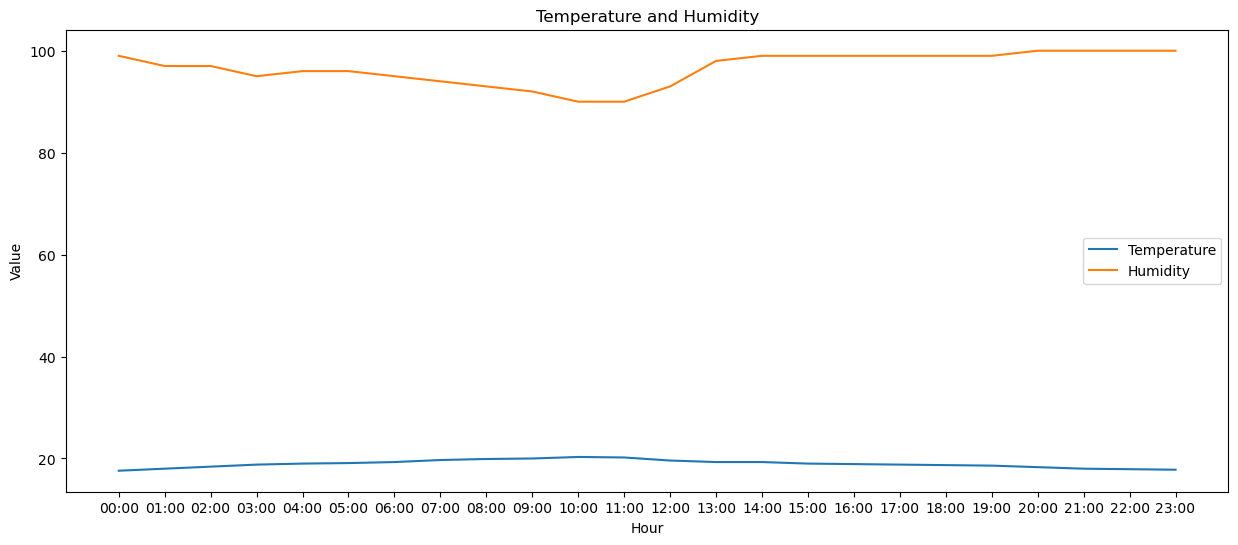

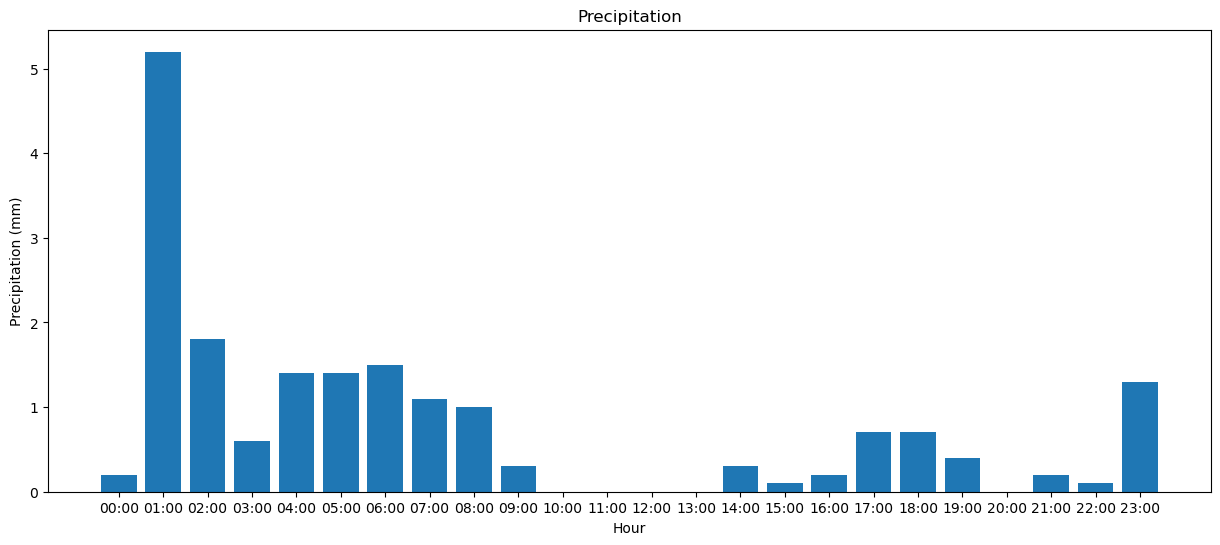

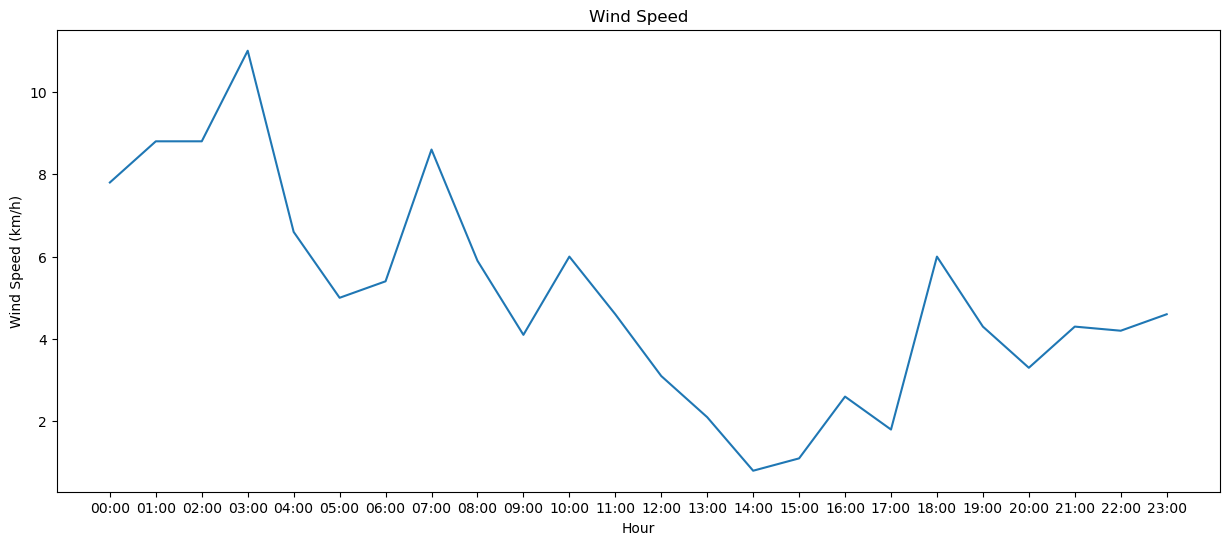

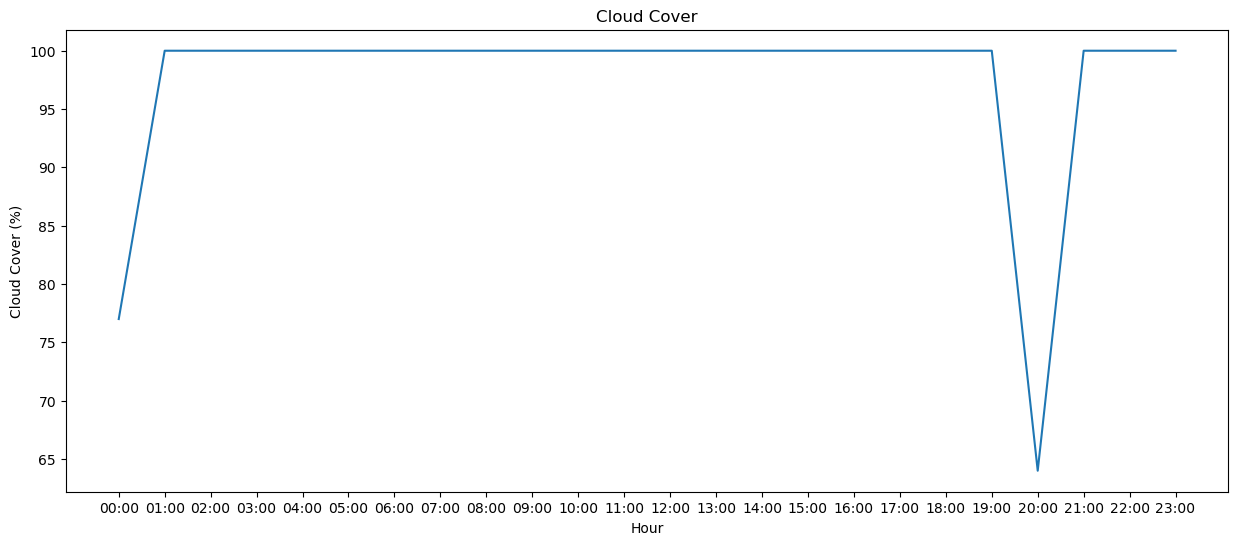

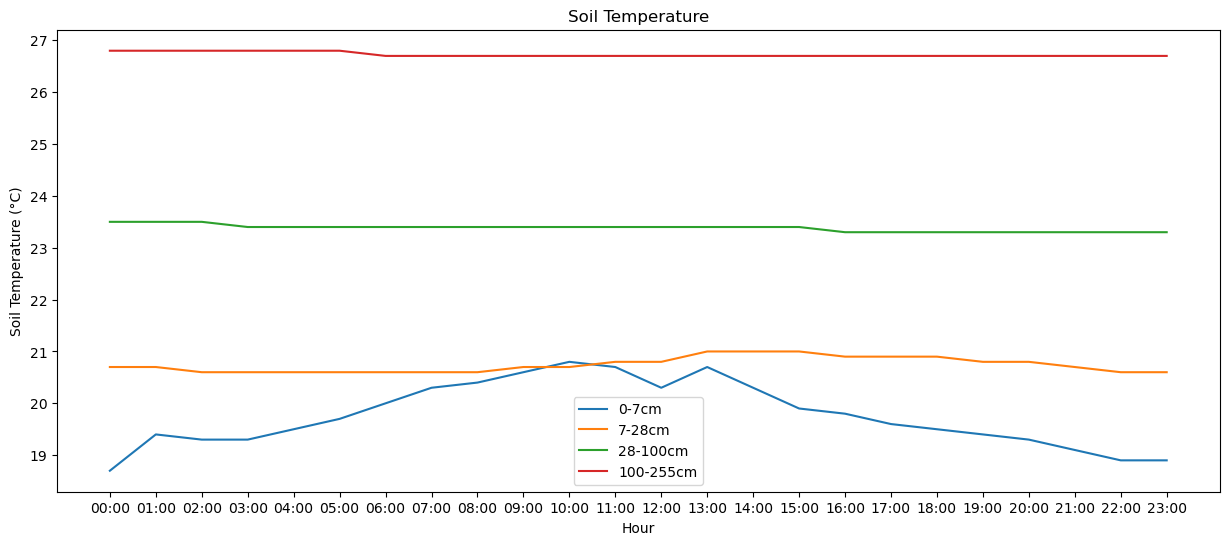

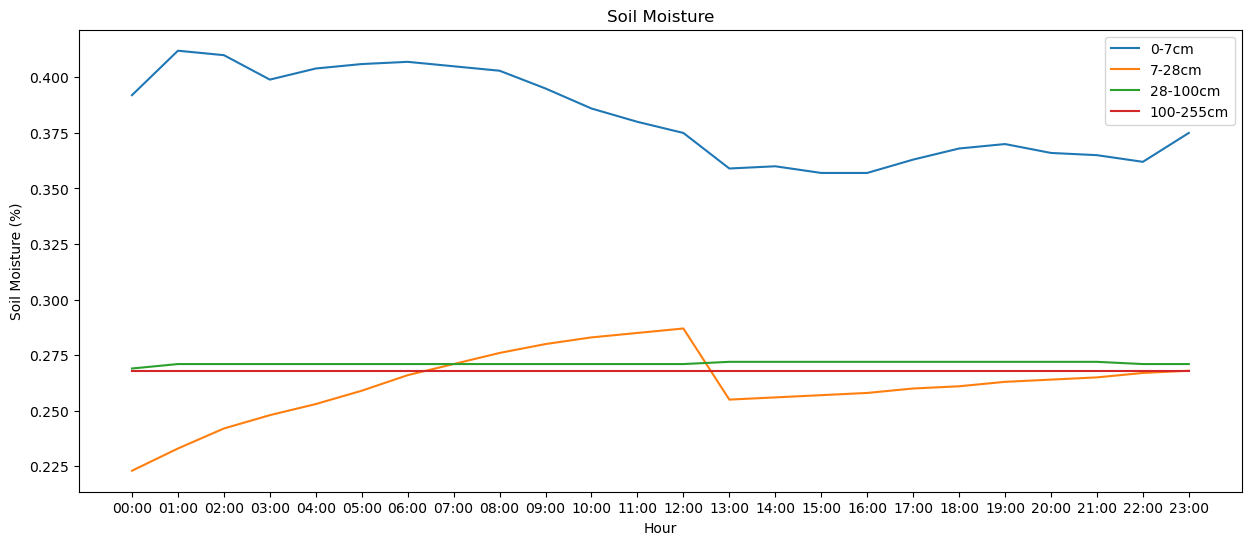

Correlation Matrix:
                           temperature_2m  relative_humidity_2m  \
temperature_2m                   1.000000             -0.831301   
relative_humidity_2m            -0.831301              1.000000   
precipitation                   -0.268954              0.014027   
wind_speed_10m                  -0.148897             -0.287923   
cloud_cover                      0.353070             -0.279937   
soil_temperature_0_to_7cm        0.945872             -0.724758   
soil_moisture_0_to_7cm           0.151751             -0.515912   

                           precipitation  wind_speed_10m  cloud_cover  \
temperature_2m                 -0.268954       -0.148897     0.353070   
relative_humidity_2m            0.014027       -0.287923    -0.279937   
precipitation                   1.000000        0.495670     0.188789   
wind_speed_10m                  0.495670        1.000000    -0.002396   
cloud_cover                     0.188789       -0.002396     1.000000   
soil_

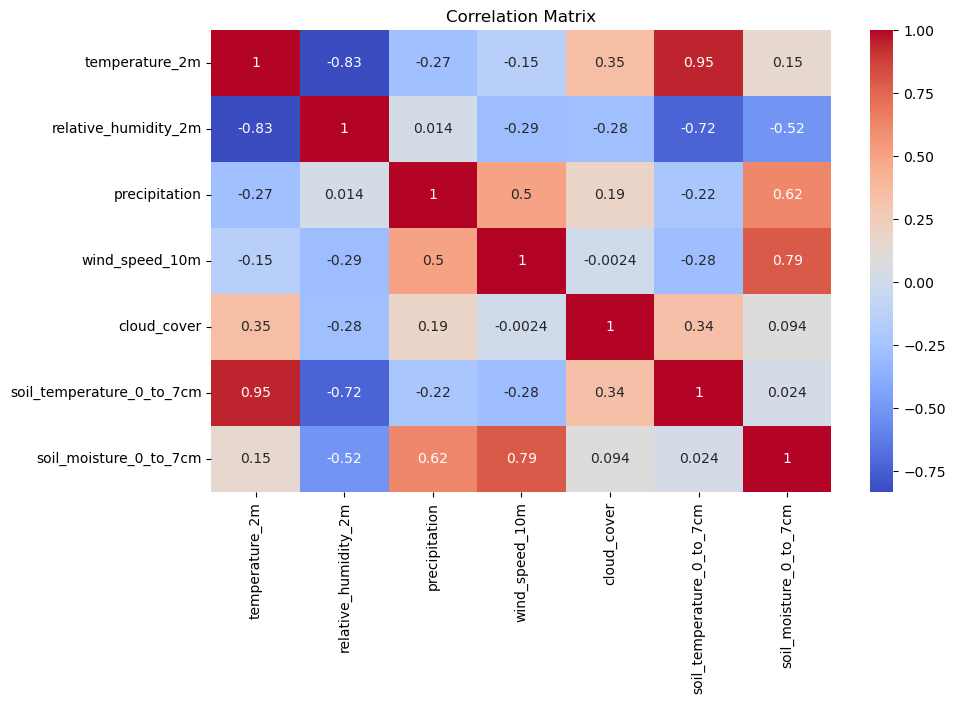

Regression Coefficients:
[ 9.00774386e-01  2.52366761e-02  1.02484579e-01 -4.39538725e-02
 -8.16133433e-04]
R-squared: 0.9675072396321898
Mean Squared Error: 0.016038426517551115


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(weather_data)

# Calculate summary statistics
print("Summary Statistics:")
print(df.describe())

# Plot temperature and humidity
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['temperature_2m'], label='Temperature')
plt.plot(df['hour'], df['relative_humidity_2m'], label='Humidity')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.title('Temperature and Humidity')
plt.legend()
plt.show()

# Plot precipitation
plt.figure(figsize=(15,6))
plt.bar(df['hour'], df['precipitation'])
plt.xlabel('Hour')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation')
plt.show()

# Plot wind speed
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['wind_speed_10m'])
plt.xlabel('Hour')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed')
plt.show()

# Plot cloud cover
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['cloud_cover'])
plt.xlabel('Hour')
plt.ylabel('Cloud Cover (%)')
plt.title('Cloud Cover')
plt.show()

# Plot soil temperature
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['soil_temperature_0_to_7cm'], label='0-7cm')
plt.plot(df['hour'], df['soil_temperature_7_to_28cm'], label='7-28cm')
plt.plot(df['hour'], df['soil_temperature_28_to_100cm'], label='28-100cm')
plt.plot(df['hour'], df['soil_temperature_100_to_255cm'], label='100-255cm')
plt.xlabel('Hour')
plt.ylabel('Soil Temperature (°C)')
plt.title('Soil Temperature')
plt.legend()
plt.show()

# Plot soil moisture
plt.figure(figsize=(15,6))
plt.plot(df['hour'], df['soil_moisture_0_to_7cm'], label='0-7cm')
plt.plot(df['hour'], df['soil_moisture_7_to_28cm'], label='7-28cm')
plt.plot(df['hour'], df['soil_moisture_28_to_100cm'], label='28-100cm')
plt.plot(df['hour'], df['soil_moisture_100_to_255cm'], label='100-255cm')
plt.xlabel('Hour')
plt.ylabel('Soil Moisture (%)')
plt.title('Soil Moisture')
plt.legend()
plt.show()

# Correlation analysis
corr_matrix = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'cloud_cover', 'soil_temperature_0_to_7cm', 'soil_moisture_0_to_7cm']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap of correlation matrix
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression analysis
X = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'wind_speed_10m', 'cloud_cover']]
y = df['soil_temperature_0_to_7cm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regression Coefficients:")
print(model.coef_)
print("R-squared:", model.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))